# Predictive Modeling with Facebook Prophet - Apple, Inc. (AAPL)

###  Overview: 
- 1) Importing the data.
- 2) Data Preprocessing.
- 3) Normalizing the data.
- 4) Modeling.


## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler

from fbprophet import Prophet

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

-----

## Company Name

In [2]:
company_name = 'Apple'

## Importing the Data:

In [3]:
def data_reader(company_name):
    company_name=company_name
    df = pd.read_csv(f'data/{company_name}_Clean.csv')
    df['Date'] = pd.to_datetime(df.Date)
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True, ascending=True)
    return df

In [4]:
df = data_reader(company_name)

In [5]:
df.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0


In [6]:
def import_split_data(company_name):
    """ 
    Returns the Train and Test Set from a CSV. 
    Additionally, the Date Column is converted to date time and placed as the index. 
    """
    company_name=company_name
    
    X_train = pd.read_csv(f'data/modeling_data/{company_name}_X_Train.csv')    
    X_train['Date'] = pd.to_datetime(X_train.Date)
    X_train.set_index('Date', inplace=True)
    X_train.sort_index(inplace=True, ascending=True)
    
    X_test = pd.read_csv(f'data/modeling_data/{company_name}_X_Test.csv')
    X_test['Date'] = pd.to_datetime(X_test.Date)
    X_test.set_index('Date', inplace=True)
    X_test.sort_index(inplace=True, ascending=True)
    
    return X_train, X_test

In [7]:
X_train, X_test = import_split_data(company_name)

In [8]:
X_train.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07


In [9]:
X_test.head(2)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-03,116.65,117.20,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,...,110.936682,111.809549,3.262264e+07,0.006808,1.0,109.969134,110.881942,109.289159,110.149132,3.262266e+07
2017-01-04,115.80,116.33,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,...,111.025596,111.910490,3.253332e+07,0.006650,1.0,110.071473,110.975226,109.383424,110.255324,3.253334e+07


In [10]:
# df_shift = pd.read_csv(f'data/modeling_data/{company_name}_Shifted_DF.csv')

### Importing the Shifted Data Frame:

In [11]:
def df_shift_importer(company_name):
    company_name=company_name
    df_shift = pd.read_csv(f'data/modeling_data/{company_name}_Shifted_DF.csv')
    df_shift['Date'] = pd.to_datetime(df_shift.Date)
    df_shift.set_index('Date', inplace=True)
    df_shift.sort_index(inplace=True, ascending=True)
    return df_shift

In [12]:
df_shift = df_shift_importer(company_name)
df_shift.head(3)

,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,Adj_Low,...,Low_Long_EMA,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA
Date,,,,,,,,,,,,,,,,,,,,,
1981-04-15,27.88,28.00,27.88,27.88,29700.0,0.0,1.0,0.409914,0.411679,0.409914,...,27.100545,27.100545,395955.964908,0.0,1.0,0.399428,0.400780,0.398454,0.398454,2.217353e+07
1981-04-16,26.63,26.63,26.50,26.50,152000.0,0.0,1.0,0.391536,0.391536,0.389625,...,27.086579,27.086579,390282.570375,0.0,1.0,0.399245,0.400565,0.398249,0.398249,2.185582e+07
1981-04-20,25.12,25.12,25.00,25.00,106600.0,0.0,1.0,0.369335,0.369335,0.367570,...,27.038054,27.038054,383685.301297,0.0,1.0,0.398549,0.399838,0.397535,0.397535,2.148638e+07


-----

# Normalizing the Data with a MinMaxScaler

## Instantiating the Scaler:

In [13]:
scaler = MinMaxScaler(feature_range=(-1, 1))

## Scaling the Training Set:

In [14]:
X_train_sc = scaler.fit_transform(X_train.values)

## Scaling the Testing Set:

In [15]:
X_test_sc = scaler.transform(X_test.values)

## Setting the y Training Set:

In [16]:
y_train = df[X_train.index[0]:X_train.index[-1]].Close.values

## Setting the y Testing Set

In [17]:
y_test = df[X_test.index[0]:X_test.index[-1]].Close.values

## FB Prophet:

In [18]:
def prophet_processor(dataframe):
    temp_df = dataframe.copy()
    temp_df.reset_index(inplace=True)
    temp_df.rename(columns={'Date':'ds', 'Close':'y'}, inplace=True)
    return temp_df

In [19]:
# prophet_df = prophet_processor(df_shift)
# prophet_df.tail(2)

In [20]:
prophet_df = df_shift['2014-01-02':].copy()

prophet_df = prophet_df.merge(df[['Adj_Close']], left_index=True, right_index=True)

prophet_df.reset_index(inplace=True)

prophet_df.rename(columns={'Date': 'ds', 'Adj_Close_y': 'y'}, inplace=True)

In [21]:
prophet_df.head()

,ds,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA,y
0,2014-01-02,554.17,561.28,554.000,561.0200,7967300.0,0.0,1.0,73.661663,74.606742,...,522.575088,1.183446e+07,0.038362,1.0,69.278618,69.828871,68.730444,69.261881,8.284122e+07,73.523423
1,2014-01-03,555.68,557.03,552.021,553.1300,8381600.0,0.0,1.0,73.862376,74.041821,...,523.285667,1.175416e+07,0.037470,1.0,69.385217,69.926846,68.838480,69.360986,8.227913e+07,71.908415
2,2014-01-06,552.86,553.70,540.430,540.9800,14016700.0,0.0,1.0,73.487534,73.599189,...,523.697163,1.180678e+07,0.036599,1.0,69.480620,70.012250,68.908174,69.420229,8.264745e+07,72.300536
3,2014-01-07,537.45,546.80,533.600,543.9300,14736100.0,0.0,1.0,71.439198,72.682024,...,524.167694,1.187490e+07,0.035748,1.0,69.526168,70.074338,68.955134,69.487213,8.312432e+07,71.783135
4,2014-01-08,544.32,545.96,537.925,540.0375,11328900.0,0.0,1.0,72.352376,72.570369,...,524.536759,1.186220e+07,0.034916,1.0,69.591894,70.132385,69.014371,69.540606,8.303543e+07,72.238063


In [22]:
prophet_df.tail()

,ds,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA,y
1059,2018-03-21,175.24,176.80,174.94,175.240,19314039.0,0.0,1.0,175.24,176.80,...,171.148513,3.336089e+07,0.000543,1.0,171.060696,172.598671,169.659938,171.127298,3.336089e+07,171.270
1060,2018-03-22,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,...,171.151338,3.340476e+07,0.000530,1.0,171.153238,172.656609,169.697149,171.130617,3.340476e+07,168.845
1061,2018-03-23,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,...,171.097703,3.358258e+07,0.000518,1.0,171.126419,172.657153,169.671634,171.077463,3.358258e+07,164.940
1062,2018-03-26,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,...,170.954500,3.373761e+07,0.000506,1.0,171.062781,172.593499,169.561596,170.934731,3.373761e+07,172.770
1063,2018-03-27,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,...,170.996721,3.379657e+07,0.000494,1.0,170.993182,172.605278,169.489000,170.977412,3.379657e+07,168.340


In [23]:
prophet_df[prophet_df['ds'] > '2014-01-01']

,ds,Open,High,Low,Close,Volume,Ex_Dividend,Split_Ratio,Adj_Open,Adj_High,...,Close_Long_EMA,Volume_Long_EMA,Ex_Dividend_Long_EMA,Split_Ratio_Long_EMA,Adj_Open_Long_EMA,Adj_High_Long_EMA,Adj_Low_Long_EMA,Adj_Close_Long_EMA,Adj_Volume_Long_EMA,y
0,2014-01-02,554.1700,561.2800,554.0000,561.0200,7967300.0,0.00,1.0,73.661663,74.606742,...,522.575088,1.183446e+07,0.038362,1.0,69.278618,69.828871,68.730444,69.261881,8.284122e+07,73.523423
1,2014-01-03,555.6800,557.0300,552.0210,553.1300,8381600.0,0.00,1.0,73.862376,74.041821,...,523.285667,1.175416e+07,0.037470,1.0,69.385217,69.926846,68.838480,69.360986,8.227913e+07,71.908415
2,2014-01-06,552.8600,553.7000,540.4300,540.9800,14016700.0,0.00,1.0,73.487534,73.599189,...,523.697163,1.180678e+07,0.036599,1.0,69.480620,70.012250,68.908174,69.420229,8.264745e+07,72.300536
3,2014-01-07,537.4500,546.8000,533.6000,543.9300,14736100.0,0.00,1.0,71.439198,72.682024,...,524.167694,1.187490e+07,0.035748,1.0,69.526168,70.074338,68.955134,69.487213,8.312432e+07,71.783135
4,2014-01-08,544.3200,545.9600,537.9250,540.0375,11328900.0,0.00,1.0,72.352376,72.570369,...,524.536759,1.186220e+07,0.034916,1.0,69.591894,70.132385,69.014371,69.540606,8.303543e+07,72.238063
5,2014-01-09,538.8100,545.5600,538.6900,543.4600,9233200.0,0.00,1.0,71.619973,72.517200,...,524.976835,1.180106e+07,0.034104,1.0,69.639059,70.187846,69.074595,69.603338,8.260745e+07,71.315448
6,2014-01-10,546.8000,546.8600,535.3501,536.5190,9969600.0,0.00,1.0,72.682024,72.689999,...,525.245257,1.175847e+07,0.033311,1.0,69.709825,70.246035,69.123095,69.643154,8.230931e+07,70.839718
7,2014-01-13,539.8300,540.8000,531.1100,532.9400,10892000.0,0.00,1.0,71.755554,71.884489,...,525.424205,1.173832e+07,0.032536,1.0,69.757400,70.284139,69.157359,69.670981,8.216825e+07,71.210572
8,2014-01-14,529.9100,542.5000,529.8800,535.7300,13517600.0,0.00,1.0,70.436963,72.110457,...,525.663874,1.177970e+07,0.031780,1.0,69.773204,70.326611,69.187025,69.706786,8.245790e+07,72.627526
9,2014-01-15,538.2200,546.7300,537.6600,546.3900,11877200.0,0.00,1.0,71.541549,72.672719,...,526.145877,1.178197e+07,0.031041,1.0,69.814328,70.381172,69.240050,69.774710,8.247378e+07,74.085685


In [24]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(prophet_df)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [25]:
forecast[forecast['ds'] > '2018-06-27'][['ds', 'yhat']]

,ds,yhat
1156,2018-06-28,185.323308
1157,2018-06-29,185.352181
1158,2018-06-30,185.267201
1159,2018-07-01,185.391794
1160,2018-07-02,185.842778
1161,2018-07-03,186.007451
1162,2018-07-04,186.214113
1163,2018-07-05,186.331505
1164,2018-07-06,186.508777
1165,2018-07-07,186.555369


In [26]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1272,2018-10-22,199.391147,186.928471,210.348151
1273,2018-10-23,199.803621,187.680968,211.031405
1274,2018-10-24,200.239632,188.035996,211.822843
1275,2018-10-25,200.566842,188.091889,212.135054
1276,2018-10-26,200.933569,188.328700,212.455726


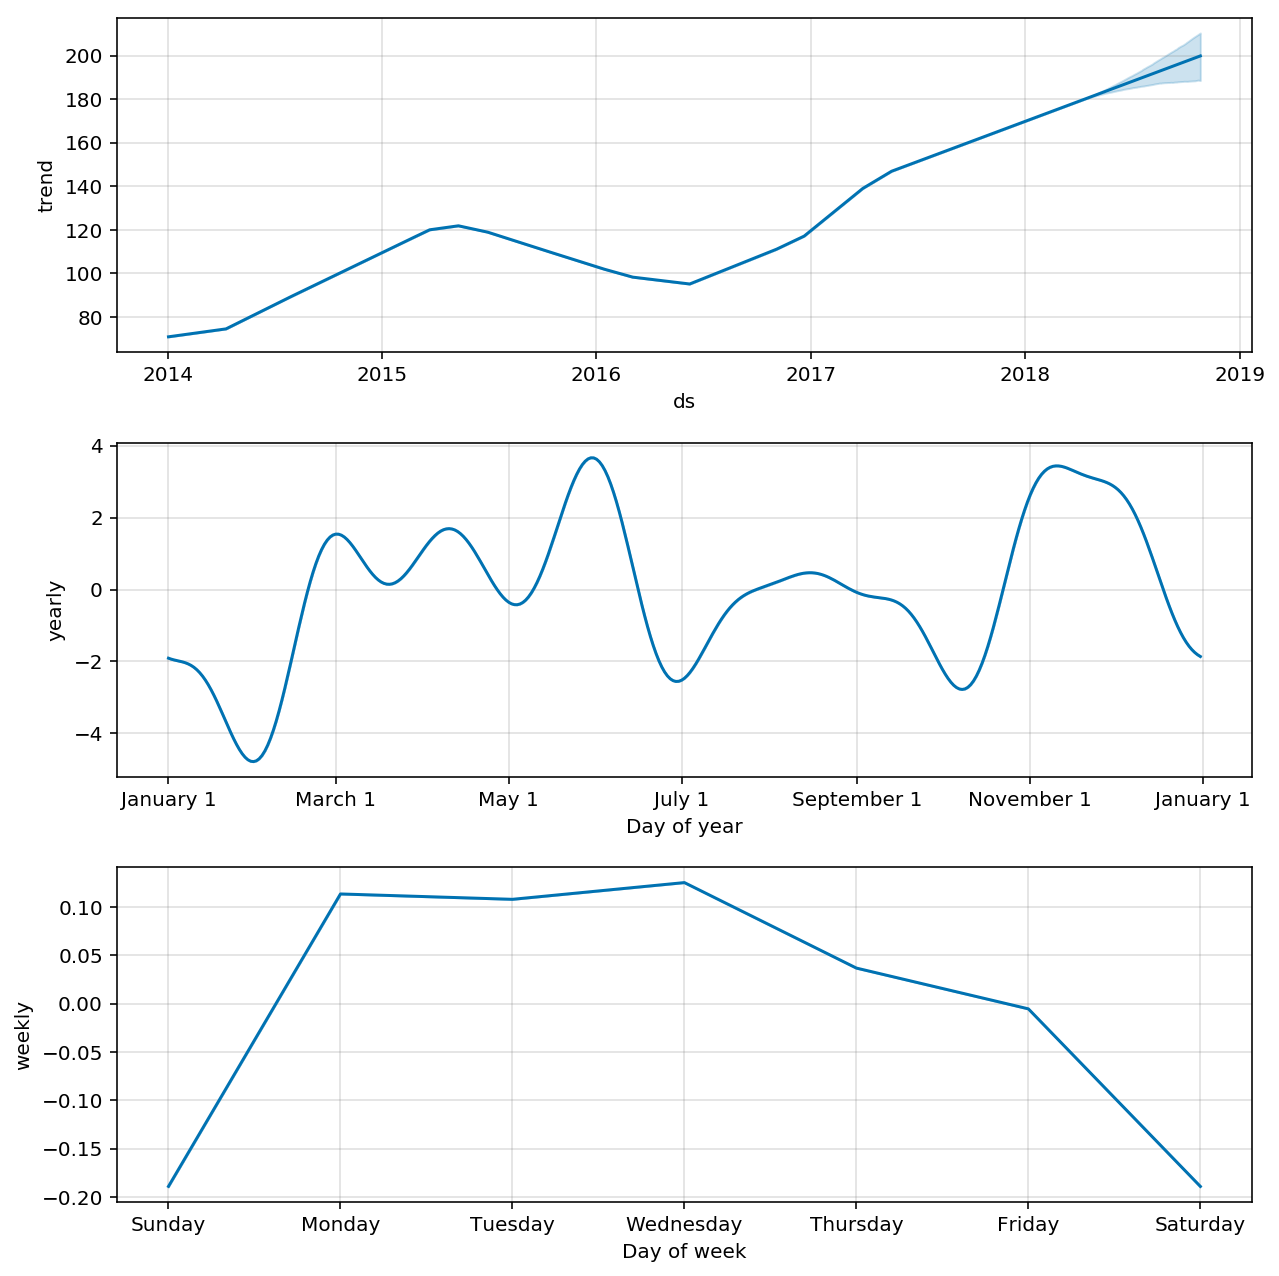

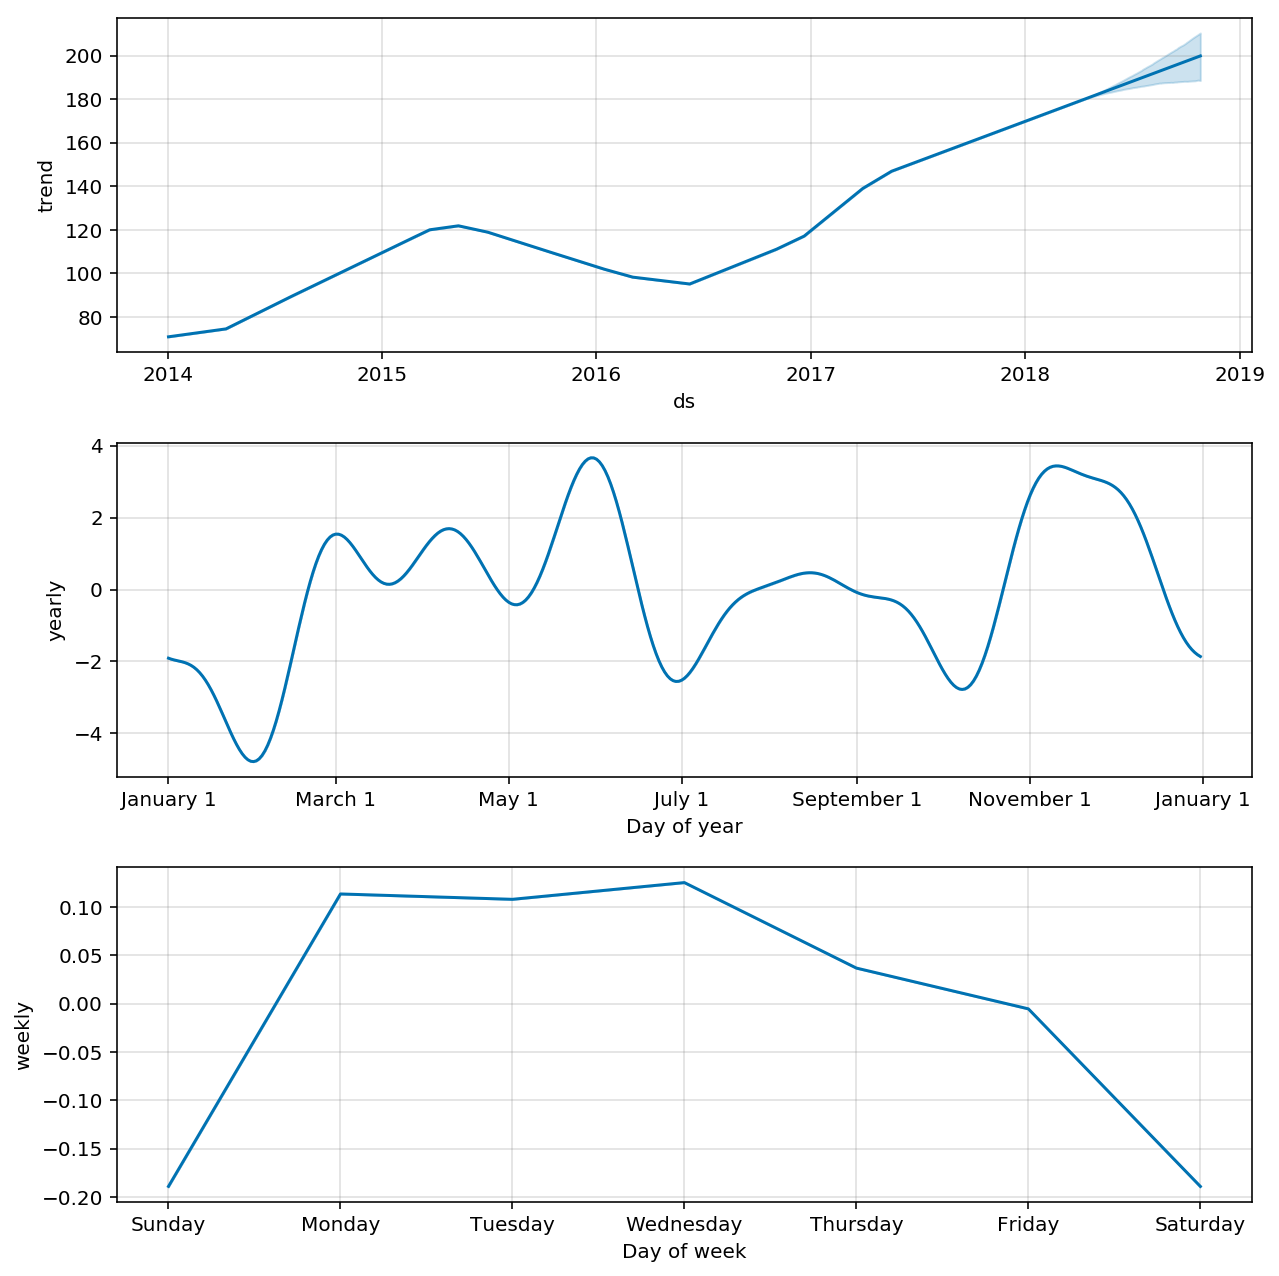

In [27]:
m.plot_components(forecast)


## Try to predict some observed data

In [28]:
prophet_df = X_train.copy()

prophet_df = prophet_df.merge(df[['Adj_Close']], left_index=True, right_index=True)

prophet_df.reset_index(inplace=True)

prophet_df.rename(columns={'Date': 'ds', 'Adj_Close_y': 'y'}, inplace=True)

In [29]:
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(prophet_df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [30]:
future = m.make_future_dataframe(periods=450)
forecast = m.predict(future)

In [31]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
9452,2018-03-21,136.018913,129.056485,143.171475
9453,2018-03-22,136.081137,128.827157,143.196394
9454,2018-03-23,136.094780,129.456057,143.222970
9455,2018-03-24,135.956694,129.094440,143.232731
9456,2018-03-25,136.006138,128.930664,143.174491


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/adamdelreal/anaconda3/envs/tensorflow/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


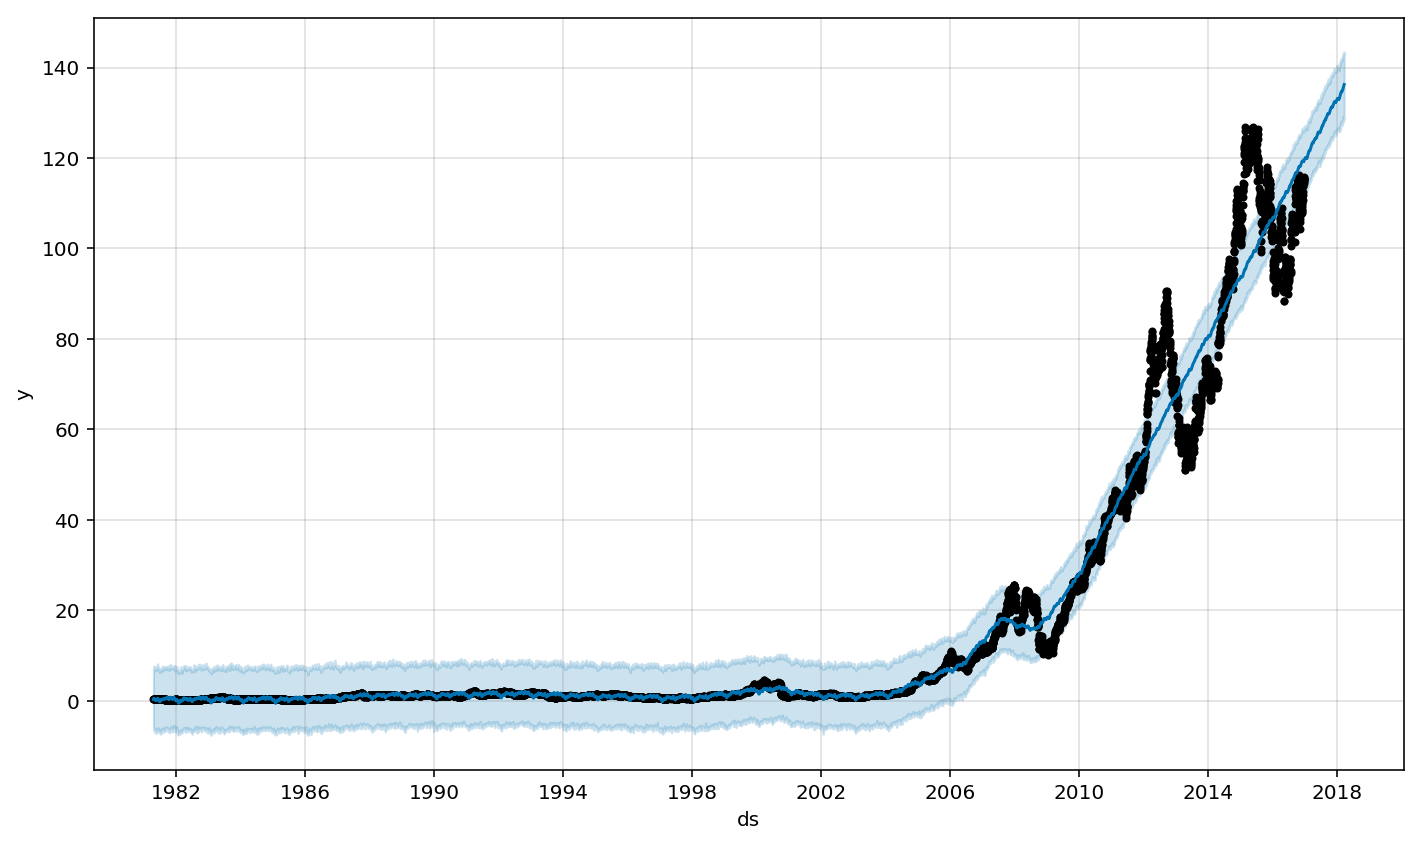

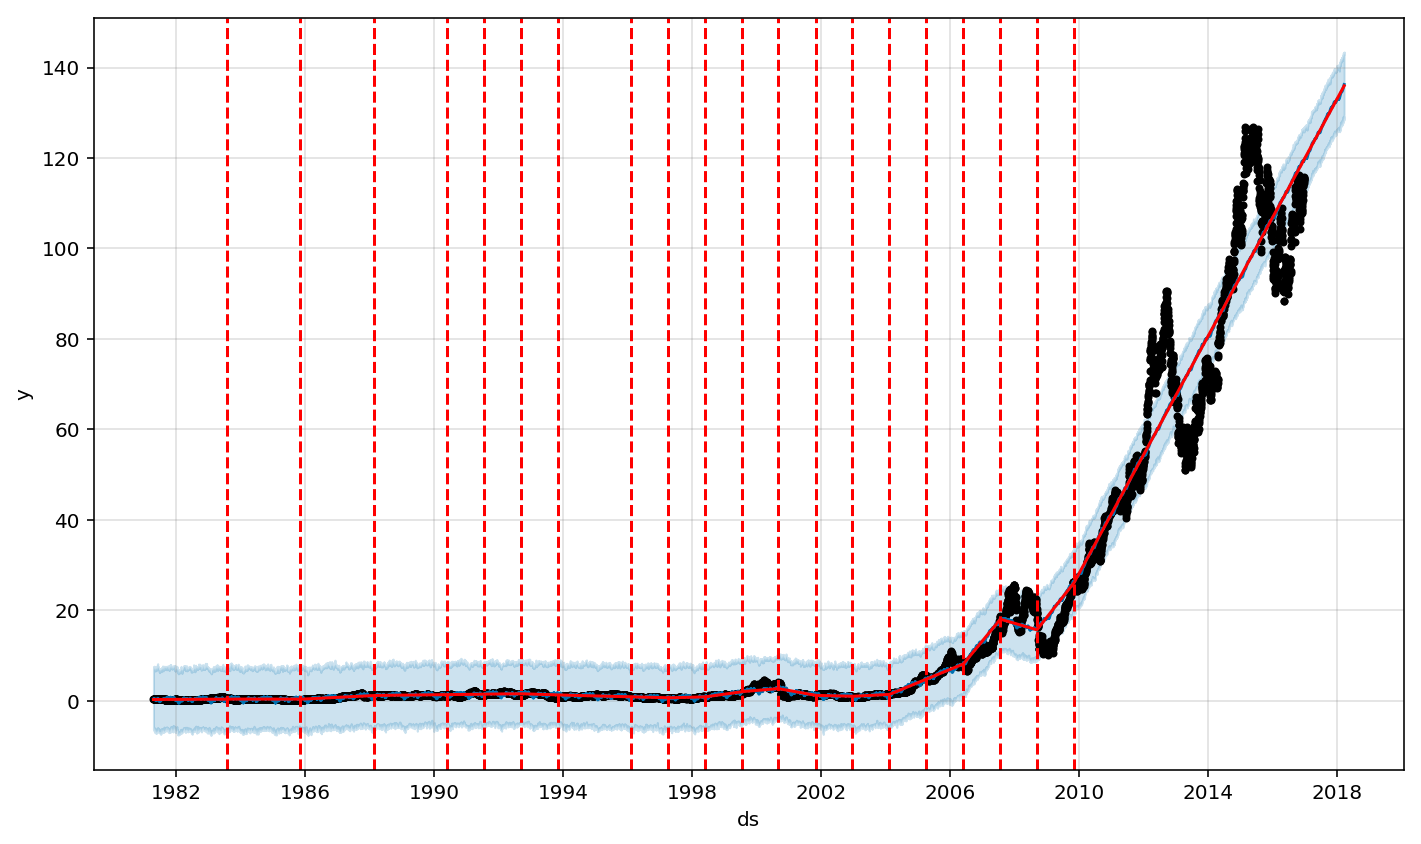

In [33]:
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(prophet_df).predict(future)
fig = m.plot(forecast)

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)